In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

### [연습문제 14-1]

In [3]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

# let's have a look
data

/Users/junho/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


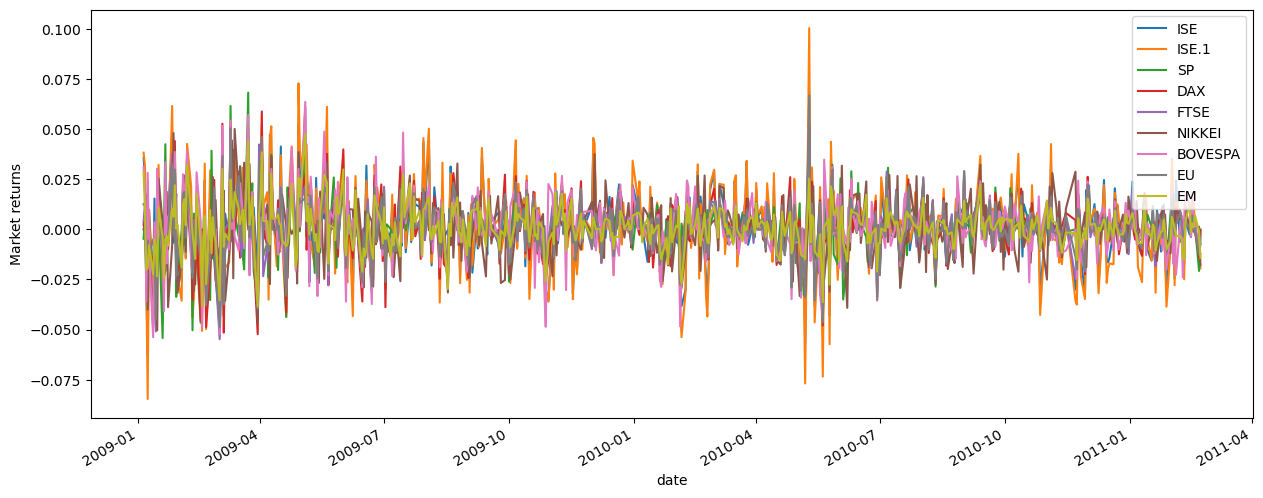

In [4]:
# show some data in line plots
data.plot(figsize=(15,6),ylabel='Market returns')
plt.show()


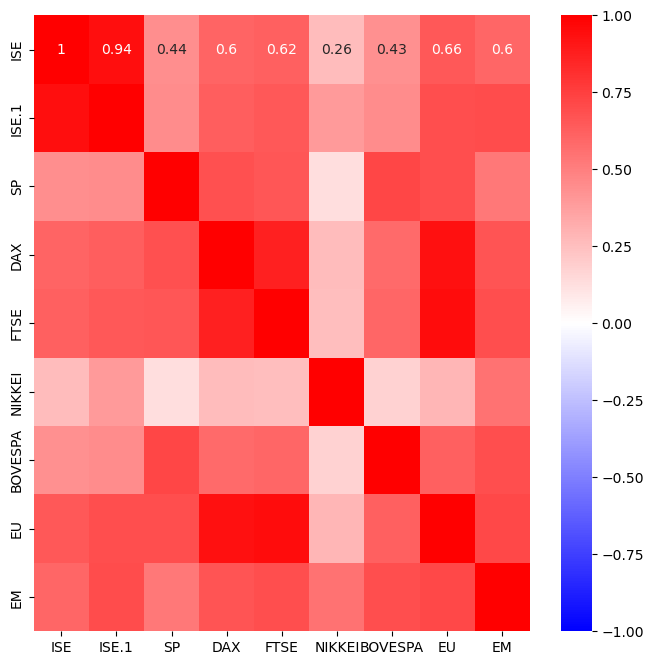

In [6]:

plt.figure(figsize=(8,8))
heatmap = sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='bwr')
plt.show()

In [7]:
data_centered = data - data.mean()

In [8]:
cov_matrix = np.cov(data_centered.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [9]:
principal_components = np.dot(data_centered, eigenvectors)

explained_variance_ratio = eigenvalues / eigenvalues.sum()

print("고윳값 (Eigenvalues):", eigenvalues)
print("\n설명된 분산 비율 (Explained Variance Ratio):", explained_variance_ratio)
print("\n주성분 (Principal Components):")
print(principal_components)

고윳값 (Eigenvalues): [1.30059955e-03 2.85852329e-04 1.95032489e-04 1.22534791e-04
 6.04559244e-05 5.00103709e-06 1.28347506e-05 2.23967857e-05
 2.42643361e-05]

설명된 분산 비율 (Explained Variance Ratio): [0.64101405 0.1408853  0.0961238  0.06039255 0.02979633 0.00246481
 0.00632574 0.01103849 0.01195893]

주성분 (Principal Components):
[[ 0.0524148   0.01548812  0.00918583 ... -0.0068441  -0.00464866
  -0.00061593]
 [ 0.04506811  0.00748826  0.00706312 ...  0.00193903  0.00435705
  -0.00193337]
 [-0.06959746  0.02407384 -0.02129056 ...  0.00796255  0.00121518
   0.00947168]
 ...
 [ 0.00145891 -0.0050516  -0.00352487 ... -0.00305212 -0.0034939
   0.00151786]
 [-0.0368831   0.01059206 -0.00700615 ... -0.00020588 -0.00307766
  -0.0009866 ]
 [-0.02880234 -0.01134873  0.01374974 ... -0.0019753   0.00322506
   0.00226402]]


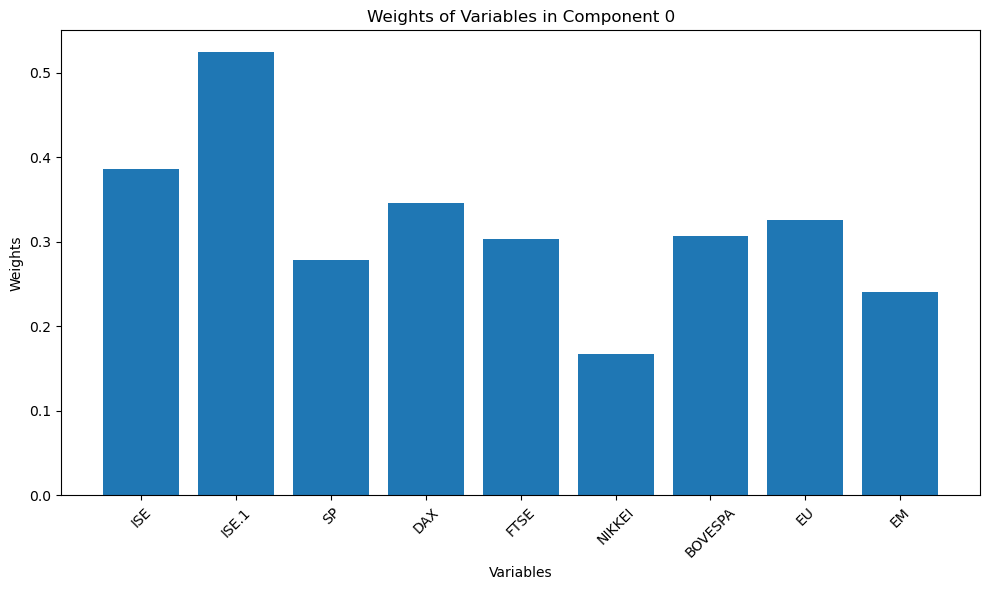

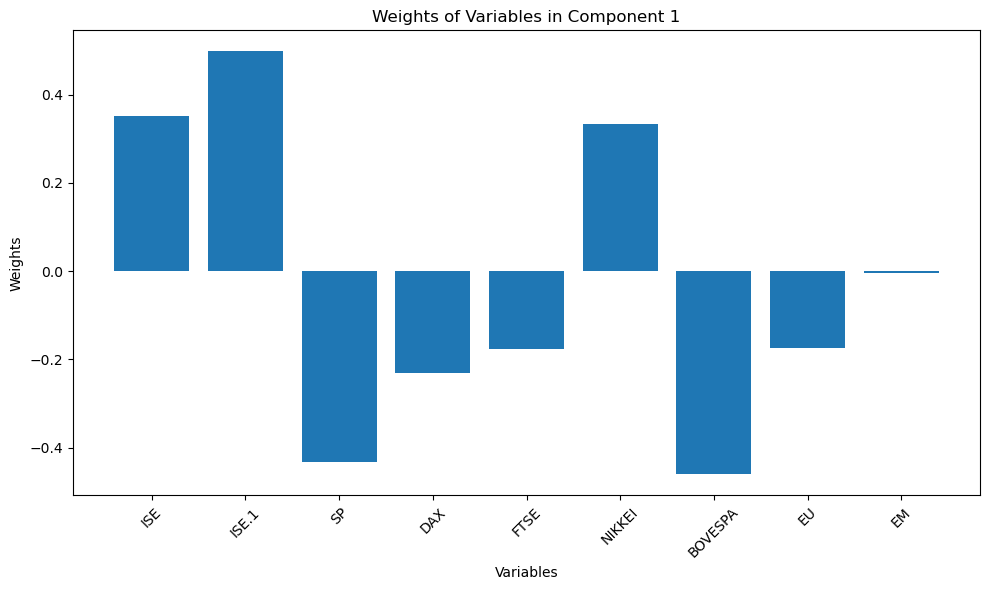

In [11]:
component_0_weights = eigenvectors[:, 0]
component_1_weights = eigenvectors[:, 1]

# 구성 요소 0 가중치 시각화
plt.figure(figsize=(10, 6))
plt.bar(data.columns, component_0_weights)
plt.xlabel('Variables')
plt.ylabel('Weights')
plt.title('Weights of Variables in Component 0')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 구성 요소 1 가중치 시각화
plt.figure(figsize=(10, 6))
plt.bar(data.columns, component_1_weights)
plt.xlabel('Variables')
plt.ylabel('Weights')
plt.title('Weights of Variables in Component 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### [연습문제 14-2]

In [14]:
u1,s1,vt1 = np.linalg.svd(cov_matrix)

print(s1[:10])

[1.30059955e-03 2.85852329e-04 1.95032489e-04 1.22534791e-04
 6.04559244e-05 2.42643361e-05 2.23967857e-05 1.28347506e-05
 5.00103709e-06]


In [16]:
u2,s2,vt2 = np.linalg.svd(data)

print(s2[:10]**2/(data.shape[0]-1))

[1.30814972e-03 2.86011465e-04 1.95104885e-04 1.22858364e-04
 6.04613693e-05 2.42783321e-05 2.24060570e-05 1.30314810e-05
 5.00924903e-06]


### [연습문제 14-3]

In [18]:
### (교재 내용 참고)
### As above, it suffices to show that the eigenvalues and eigenvectors match.

from sklearn.decomposition import PCA

pca = PCA()
X_t = pca.fit_transform(data)

# compare percent-normalized eigenvalues
print('Eigenvalues:')
print(eigenvalues[:4])

print(f'\nExplained variance from sklearn:')
print(pca.explained_variance_[:4])



# eigenvector and sklearn component
print('\n\n\nFirst eigenvector:')
print(eigenvectors[:,0])

print('\nFirst sklearn component vector:')
print(pca.components_[0,:])

Eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]

Explained variance from sklearn:
[0.0013006  0.00028585 0.00019503 0.00012253]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First sklearn component vector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]


### [연습문제 14-4]

In [20]:
x = np.hstack((np.random.randn(1000,1),.05*np.random.randn(1000,1)))

# rotation matrices
th = -np.pi/6
R1 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])
th = -np.pi/3
R2 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])

# create the data
X = np.vstack((x@R1,x@R2))
X.shape

(2000, 2)

In [21]:
# PCA via SVD
U,s,Vt = np.linalg.svd(X-np.mean(X,axis=0,keepdims=True))

# not necessary: convert singular values into eigenvalues
s = s**2 / (X.shape[0]-1)

# also not necessary: up-scale the singular vectors for visualization
Vt *= 2

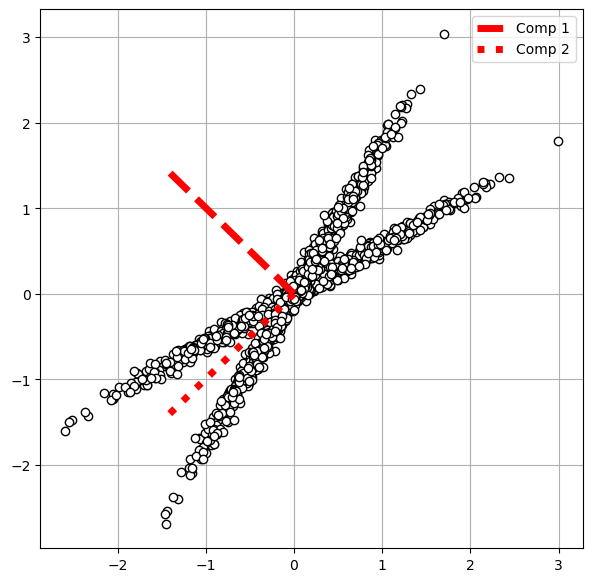

In [22]:
# plot the data and eigenvectors

plt.figure(figsize=(7,7))

# the data
plt.plot(X[:,0],X[:,1],'ko',markerfacecolor='w')

# eigenvectors
plt.plot([0,Vt[0,0]],[0,Vt[1,0]],'r--',linewidth=5,label='Comp 1')
plt.plot([0,Vt[0,1]],[0,Vt[1,1]],'r:',linewidth=5,label='Comp 2')

plt.legend()
plt.grid()
plt.show()

- 잘 모르겠어서 교재 코드를 참고했습니다..